In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_total_all = pd.read_csv('Universitas Pertamina.csv')
print(df_total_all)

                  nama                                             review  \
0                Te Ir  Universitas yang menjadi bagian Pertamina (per...   
1                 RHDN  Kampus nya cukup besar, lokasi pinggir jalan s...   
2         Mega Safitri  Kami pilih kampus ini dg harapan setelah lulus...   
3    Muhammad Zidane A  walaupun terbilang masih baru, tetapi kampus i...   
4          Fahmi Amhar  Campus ini memiliki sarana yang cukup lengkap,...   
..                 ...                                                ...   
646     Taufik Wahyudi                   thanks god for the chance we had   
647    Bernie Soebekti  Secara keseluruhan, suasananya nyaman untuk be...   
648    Muhammad Fauzie    Overall, it has comfortable atmosphere to study   
649           Agus Bgr                                  Tempat yang bagus   
650        rizky malik                                         Good place   

     bintang  
0          4  
1          4  
2          4  
3          4  


In [59]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
print(df_total_all_new)

                  nama                                             review  \
0                Te Ir  Universitas yang menjadi bagian Pertamina (per...   
1                 RHDN  Kampus nya cukup besar, lokasi pinggir jalan s...   
2         Mega Safitri  Kami pilih kampus ini dg harapan setelah lulus...   
3    Muhammad Zidane A  walaupun terbilang masih baru, tetapi kampus i...   
4          Fahmi Amhar  Campus ini memiliki sarana yang cukup lengkap,...   
..                 ...                                                ...   
435     Taufik Wahyudi                   thanks god for the chance we had   
436    Bernie Soebekti  Secara keseluruhan, suasananya nyaman untuk be...   
437    Muhammad Fauzie    Overall, it has comfortable atmosphere to study   
438           Agus Bgr                                  Tempat yang bagus   
439        rizky malik                                         Good place   

     bintang  
0          4  
1          4  
2          4  
3          4  


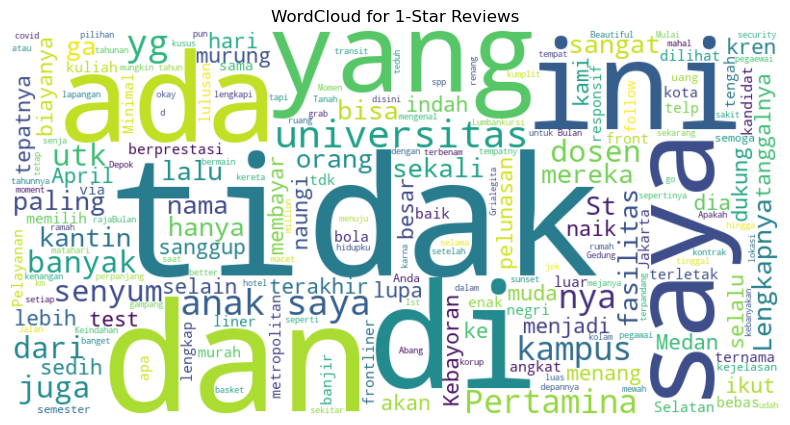

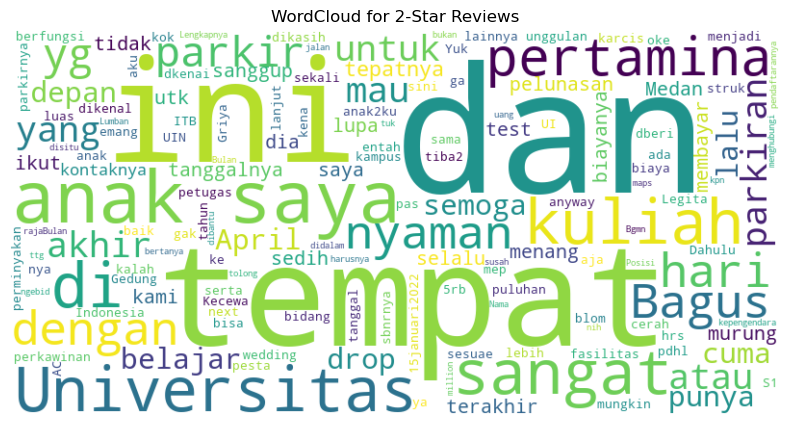

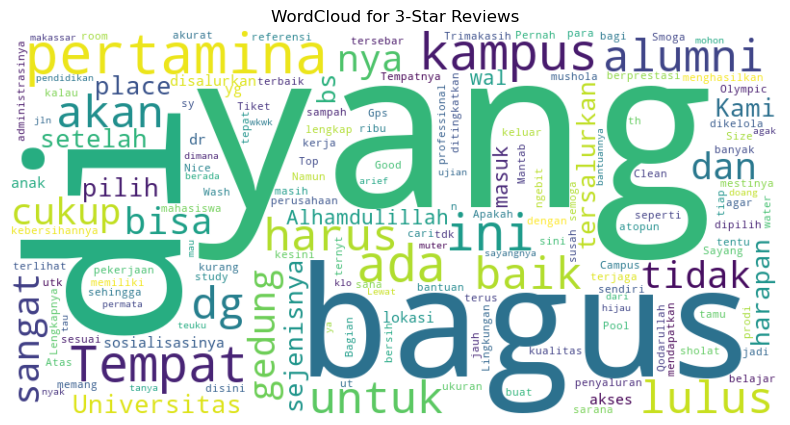

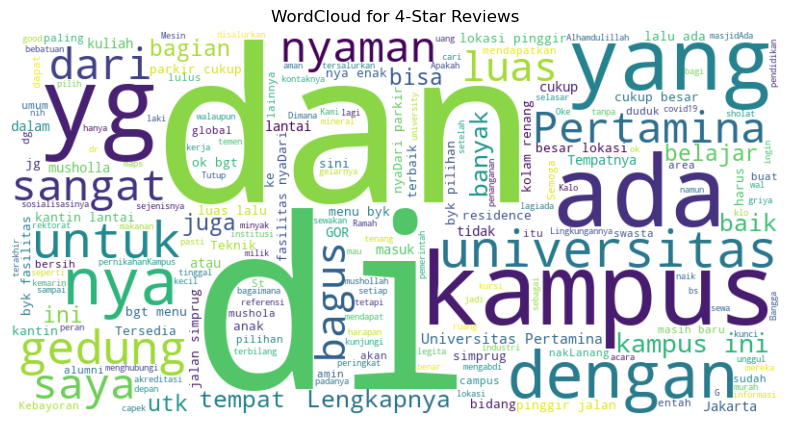

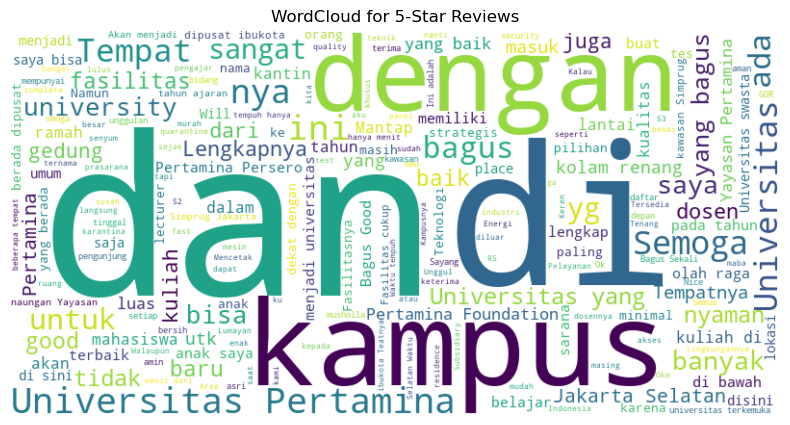

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for bintang in range(1, 6):
    # Filter DataFrame untuk review dengan bintang tertentu
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Gabungkan semua teks dalam satu string
    text = " ".join(review for review in filtered_df.review)
    
    if text:  # Check if there are any reviews for the current star rating
        # Buat wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Tampilkan wordcloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")

In [61]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 440/440 [01:43<00:00,  4.26it/s]

                  nama                                             review  \
0                Te Ir  Universitas yang menjadi bagian Pertamina (per...   
1                 RHDN  Kampus nya cukup besar, lokasi pinggir jalan s...   
2         Mega Safitri  Kami pilih kampus ini dg harapan setelah lulus...   
3    Muhammad Zidane A  walaupun terbilang masih baru, namun kampus in...   
4          Fahmi Amhar  Kampus ini memiliki sarana yang cukup lengkap,...   
..                 ...                                                ...   
435     Taufik Wahyudi         syukurlah atas kesempatan yang kita miliki   
436    Bernie Soebekti  Secara keseluruhan, suasananya nyaman untuk be...   
437    Muhammad Fauzie  Secara keseluruhan suasananya nyaman untuk bel...   
438           Agus Bgr                                  Tempat yang bagus   
439        rizky malik                                  Tempat yang bagus   

     bintang  
0          4  
1          4  
2          4  
3          4  



C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_20620\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [62]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/1320 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 440/440 [00:00<00:00, 219832.49it/s]

                nama                                             review  \
0              te ir  universitas yang menjadi bagian pertamina pers...   
1               rhdn  kampus nya cukup besar lokasi pinggir jalan si...   
2       mega safitri  kami pilih kampus ini dg harapan setelah lulus...   
3  muhammad zidane a  walaupun terbilang masih baru namun kampus ini...   
4        fahmi amhar  kampus ini memiliki sarana yang cukup lengkap ...   

   bintang  word_count  
0        4          31  
1        4          88  
2        4          77  
3        4         103  
4        3          48  


In [63]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                  nama                                             review  \
0                te ir  universitas yang menjadi bagian pertamina pers...   
1                 rhdn  kampus nya cukup besar lokasi pinggir jalan si...   
2         mega safitri  kami pilih kampus ini dg harapan setelah lulus...   
3    muhammad zidane a  walaupun terbilang masih baru namun kampus ini...   
4          fahmi amhar  kampus ini memiliki sarana yang cukup lengkap ...   
..                 ...                                                ...   
435     taufik wahyudi         syukurlah atas kesempatan yang kita miliki   
436    bernie soebekti  secara keseluruhan suasananya nyaman untuk bel...   
437    muhammad fauzie  secara keseluruhan suasananya nyaman untuk bel...   
438           agus bgr                                  tempat yang bagus   
439        rizky malik                                  tempat yang bagus   

     bintang  word_count                                             tokens

In [64]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 440/440 [00:00<00:00, 146584.10it/s]

                  nama                                             review  \
0                te ir  universitas yang menjadi bagian pertamina pers...   
1                 rhdn  kampus nya cukup besar lokasi pinggir jalan si...   
2         mega safitri  kami pilih kampus ini dg harapan setelah lulus...   
3    muhammad zidane a  walaupun terbilang masih baru namun kampus ini...   
4          fahmi amhar  kampus ini memiliki sarana yang cukup lengkap ...   
..                 ...                                                ...   
435     taufik wahyudi         syukurlah atas kesempatan yang kita miliki   
436    bernie soebekti  secara keseluruhan suasananya nyaman untuk bel...   
437    muhammad fauzie  secara keseluruhan suasananya nyaman untuk bel...   
438           agus bgr                                  tempat yang bagus   
439        rizky malik                                  tempat yang bagus   

     bintang  word_count                                             tokens

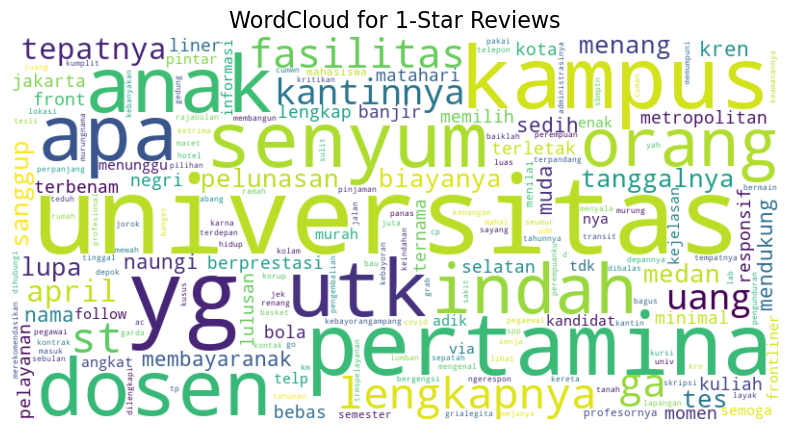

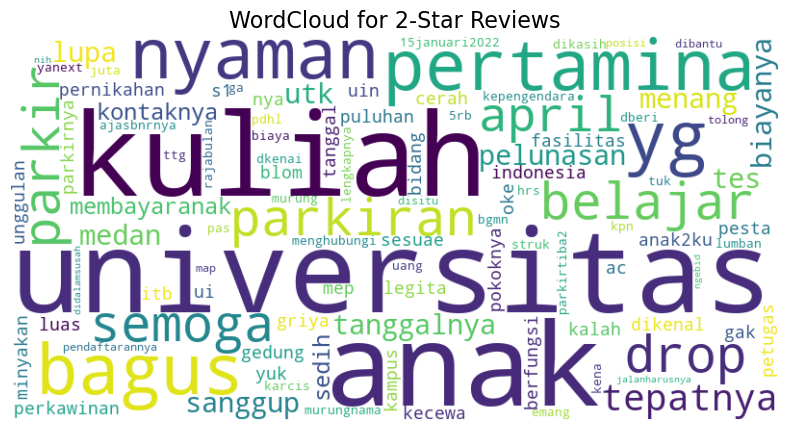

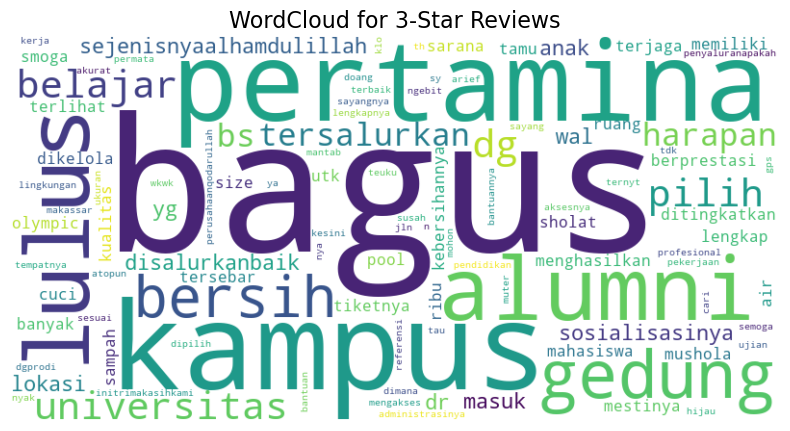

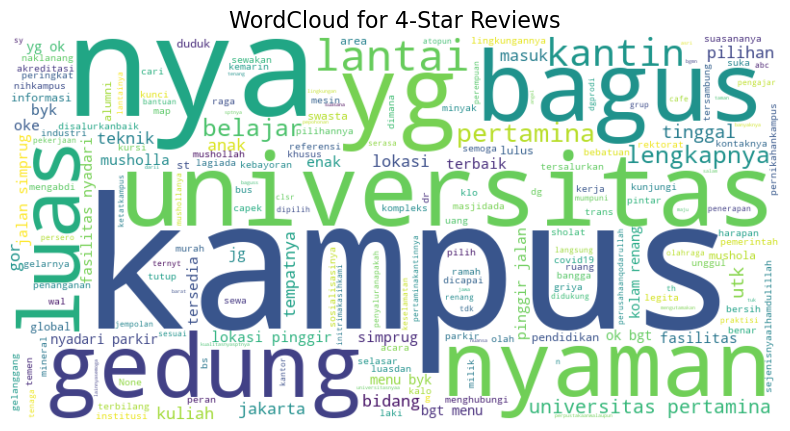

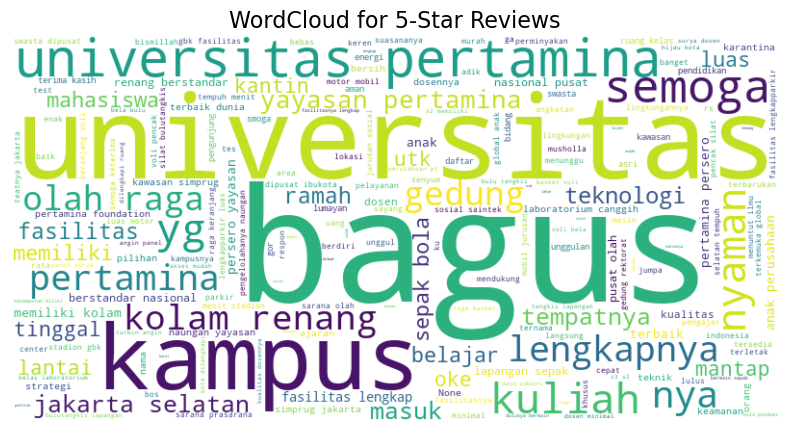

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [66]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 440/440 [00:37<00:00, 11.73it/s]

                  nama                                             review  \
0                te ir  universitas yang menjadi bagian pertamina pers...   
1                 rhdn  kampus nya cukup besar lokasi pinggir jalan si...   
2         mega safitri  kami pilih kampus ini dg harapan setelah lulus...   
3    muhammad zidane a  walaupun terbilang masih baru namun kampus ini...   
4          fahmi amhar  kampus ini memiliki sarana yang cukup lengkap ...   
..                 ...                                                ...   
435     taufik wahyudi         syukurlah atas kesempatan yang kita miliki   
436    bernie soebekti  secara keseluruhan suasananya nyaman untuk bel...   
437    muhammad fauzie  secara keseluruhan suasananya nyaman untuk bel...   
438           agus bgr                                  tempat yang bagus   
439        rizky malik                                  tempat yang bagus   

     bintang  word_count                                             tokens

In [67]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertaminakantinnya,nyaman,terap,clsr,selamat,ketatkampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,byk,fasilitas,nyadari,parkir,luas,kantin,lantai,yg,ok,bgt,menu,byk,pilih,nya,enak,,lagiada,kolam,renang,gor,yg,mushola,masjidada,tinggal,jg,yg,sewa,utk,area,jg,sewa,utk,acara,pernikahankampus,nya,lokasi,pinggir,jalan,simprug,byk,fasilitas,nyadari,parkir,luas,kantin,lantai,yg,ok,bgt,menu,byk,pilih,enak,,lengkap
pilih,kampus,dg,harap,lulus,bs,salur,pertamina sejenisnyaalhamdulillah,wal,masuk,sosialisasi,alumni,disalurkanbaik,pertamina,ato,anak,perusahaanqodarullah,dr,lulus,th,anak,sy,ternyt,cari,kerja,n,tdk,penyaluranapakah,bantu,referensi,dr,kampus,alumni,kerja,yg,sesuai,dgprodi,yg,pilih,kampus,initrimakasihkami,pilih,kampus,dg,harap,lulus,bs,salur,pertamina sejenisnyaalhamdulillah,wal,masuk,sosialisasi,alumni,disalurkanbaik,pertamina,lengkap
bilang,kampus,akreditasi,unggul,masuk,

In [68]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 32


32

In [69]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

In [203]:
import pandas as pd
import ast  # Untuk mengubah string menjadi list

# Membaca kembali file Excel
df_total_all_new = pd.read_excel("UPER_Cleaned.xlsx")

# Konversi kembali kolom 'stemmed_tokens2' dari string ke list tokenized
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(ast.literal_eval)

# Cek apakah sudah berbentuk list
print(type(df_total_all_new['stemmed_tokens2'][0]))  # Harusnya <class 'list'>



<class 'list'>


In [205]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 440/440 [00:00<00:00, 425817.66it/s]

universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantinnya,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,byk,fasilitas,nyadari,parkir,luas,kantin,lantai,yg,ok,bgt,menu,byk,pilih,nya,enak,,lagi,ada,kolam,renang,gor,yg,mushola,masjid,ada,tinggal,jg,yg,sewa,utk,area,jg,sewa,utk,acara,pernikahan,kampus,nya,lokasi,pinggir,jalan,simprug,byk,fasilitas,nyadari,parkir,luas,kantin,lantai,yg,ok,bgt,menu,byk,pilih,enak,,lengkap
pilih,kampus,dg,harap,lulus,bs,salur,pertamina,sejenisnya,alhamdulillah,wal,masuk,sosialisasi,alumni,disalurkan,baik,pertamina,ato,anak,perusahaan,qodarullah,dr,lulus,th,anak,sy,ternyt,cari,kerja,tdk,penyaluran,apakah,bantu,referensi,dr,kampus,alumni,kerja,yg,sesuai,dg,prodi,yg,pilih,kampus,ini,trima,kasih,kami,pilih,kampus,dg,harap,lulus,bs,salur,pertamina sejenisnya,alhamdulillah,wal,masuk,sosialisasi,alumni,disalurkan,baik,pertamina,lengkap
bilang,kampus,akreditasi,

In [207]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 440/440 [00:00<00:00, 440557.12it/s]

universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantinnya,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,banyak,fasilitas,nyadari,parkir,luas,kantin,lantai,yang,ok,banget,menu,banyak,pilih,nya,enak,,lagi,ada,kolam,renang,gor,yang,mushola,masjid,ada,tinggal,juga,yang,sewa,untuk,area,juga,sewa,untuk,acara,pernikahan,kampus,nya,lokasi,pinggir,jalan,simprug,banyak,fasilitas,nyadari,parkir,luas,kantin,lantai,yang,ok,banget,menu,banyak,pilih,enak,,lengkap
pilih,kampus,dengan,harap,lulus,bisa,salur,pertamina,sejenisnya,alhamdulillah,wal,masuk,sosialisasi,alumni,disalurkan,baik,pertamina,atau,anak,perusahaan,qodarullah,dari,lulus,tahu,anak,saya,ternyt,cari,kerja,tidak,penyaluran,apakah,bantu,referensi,dari,kampus,alumni,kerja,yang,sesuai,dengan,prodi,yang,pilih,kampus,ini,terima,kasih,kami,pilih,kampus,dengan,harap,lulus,bisa,salur,pertamina sejenisnya,alhamdulillah,wal,masuk,sosialisasi,

In [209]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 440/440 [00:00<00:00, 198996.52it/s]

universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantinnya,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,nya,enak,,kolam,renang,gor,mushola,masjid,tinggal,sewa,area,sewa,acara,pernikahan,kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,enak,,lengkap
pilih,kampus,harap,lulus,salur,pertamina,sejenisnya,alhamdulillah,wal,masuk,sosialisasi,alumni,disalurkan,pertamina,anak,perusahaan,qodarullah,lulus,anak,ternyt,cari,kerja,penyaluran,bantu,referensi,kampus,alumni,kerja,sesuai,prodi,pilih,kampus,terima,kasih,pilih,kampus,harap,lulus,salur,pertamina sejenisnya,alhamdulillah,wal,masuk,sosialisasi,alumni,disalurkan,pertamina,lengkap
bilang,kampus,akreditasi,unggul,masuk,peringkat,kampus,swasta,jakarta,lingkung,nyaman,kursi,selasar,capek,tinggal,duduk,musholla,gor,abc,ged

In [211]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 440/440 [00:20<00:00, 21.61it/s]

universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantin,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,nya,enak,,kolam,renang,gor,mushola,masjid,tinggal,sewa,area,sewa,acara,nikah,kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,enak,,lengkap
pilih,kampus,harap,lulus,salur,pertamina,jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,anak,usaha,qodarullah,lulus,anak,ternyt,cari,kerja,salur,bantu,referensi,kampus,alumni,kerja,sesuai,prodi,pilih,kampus,terima,kasih,pilih,kampus,harap,lulus,salur,pertamina jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,lengkap
bilang,kampus,akreditasi,unggul,masuk,peringkat,kampus,swasta,jakarta,lingkung,nyaman,kursi,selasar,capek,tinggal,duduk,musholla,gor,abc,gedung,griya,legita,lantai,lantai,laki,la

In [212]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)



Total Token Kosong: 25


25

In [213]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

In [169]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')  # Ubah ke bahasa yang diinginkan

def terjemahkan_list(token_list):
    """Fungsi untuk menerjemahkan setiap kata dalam list tokenized."""
    try:
        if isinstance(token_list, list):  # Pastikan input adalah list
            return [translator.translate(word) for word in token_list]
        return token_list  # Jika bukan list, kembalikan seperti semula
    except Exception as e:
        return ["error"]  # Tangani error agar tidak menghambat proses

# Inisialisasi tqdm untuk progress bar
tqdm.pandas()

# Terapkan penerjemahan ke setiap baris dalam 'stemmed_tokens2'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(terjemahkan_list)

# Hapus baris yang mengandung error dalam terjemahan
df_total_all_new = df_total_all_new[~df_total_all_new['stemmed_tokens4'].astype(str).str.contains("error", case=False, na=False)]

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 440/440 [09:07<00:00,  1.24s/it]

                                     stemmed_tokens4
0  [universitas, pertamina, persero, mendukung, t...
1  [kampus, nya, lokasi, pinggir, jalan, sederhan...
2  [pilih, kampus, dengan, harap, lulus, bisa, me...
3  [mengatakan, kampus, terakreditasi, unggul, ma...
4  [kampus, milik, sarana, lengkap, mengelola, ha...


In [235]:
import ast
import pandas as pd

# Fungsi untuk menghitung jumlah token kosong, 'none', dan 'nya'
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() == 'none' or token.lower() == 'nya'))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty, 'none', or 'nya' tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong, 'none', dan 'nya' langsung dari kolom 'stemmed_tokens4'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in ['none', 'nya']]  # Hapus token kosong, 'none', dan 'nya'
)

# Konfirmasi token kosong, 'none', dan 'nya' sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty, 'none', or 'nya' tokens: 0
universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantin,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,enak,kolam,renang,gor,mushola,masjid,tinggal,sewa,area,sewa,acara,nikah,kampus,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,enak,lengkap
pilih,kampus,harap,lulus,salur,pertamina,jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,anak,usaha,qodarullah,lulus,anak,ternyt,cari,kerja,salur,bantu,referensi,kampus,alumni,kerja,sesuai,prodi,pilih,kampus,terima,kasih,pilih,kampus,harap,lulus,salur,pertamina jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,lengkap
bilang,kampus,akreditasi,unggul,masuk,peringkat,kampus,swasta,jakarta,lingkung,nyaman,kursi,selasar,capek,tinggal,duduk,musholla,gor,abc,gedung,griya,le

In [217]:
# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


universitas,pertamina,persero,dukung,tenaga,ajar,langsung,praktisi,grup,pertamina,kantin,nyaman,terap,clsr,selamat,ketat,kampus,serasa,kantor,fasilitas,olahraga,mumpuni
kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,nya,enak,kolam,renang,gor,mushola,masjid,tinggal,sewa,area,sewa,acara,nikah,kampus,nya,lokasi,pinggir,jalan,simprug,fasilitas,nyadari,parkir,luas,kantin,lantai,ok,banget,menu,pilih,enak,lengkap
pilih,kampus,harap,lulus,salur,pertamina,jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,anak,usaha,qodarullah,lulus,anak,ternyt,cari,kerja,salur,bantu,referensi,kampus,alumni,kerja,sesuai,prodi,pilih,kampus,terima,kasih,pilih,kampus,harap,lulus,salur,pertamina jenis,alhamdulillah,wal,masuk,sosialisasi,alumni,salur,pertamina,lengkap
bilang,kampus,akreditasi,unggul,masuk,peringkat,kampus,swasta,jakarta,lingkung,nyaman,kursi,selasar,capek,tinggal,duduk,musholla,gor,abc,gedung,griya,legita,lantai,lantai,laki,lant

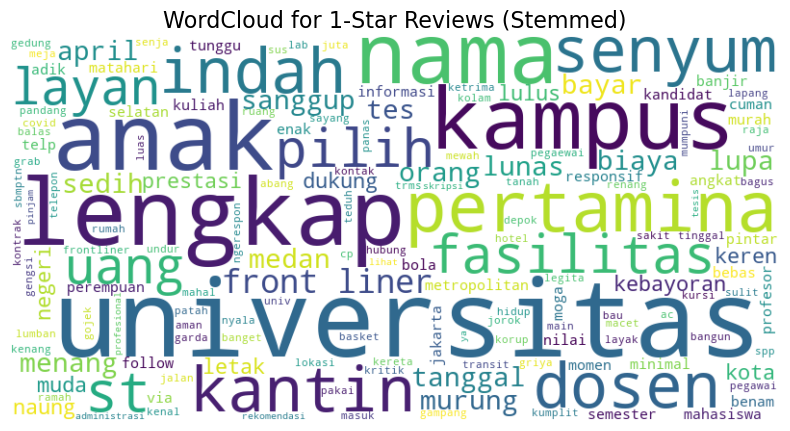

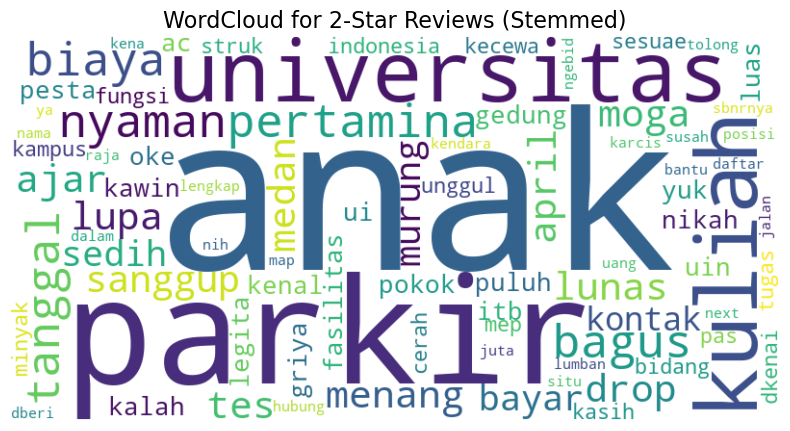

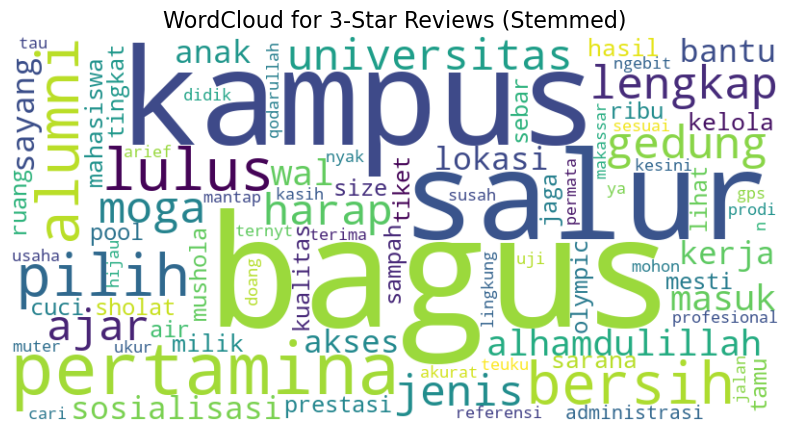

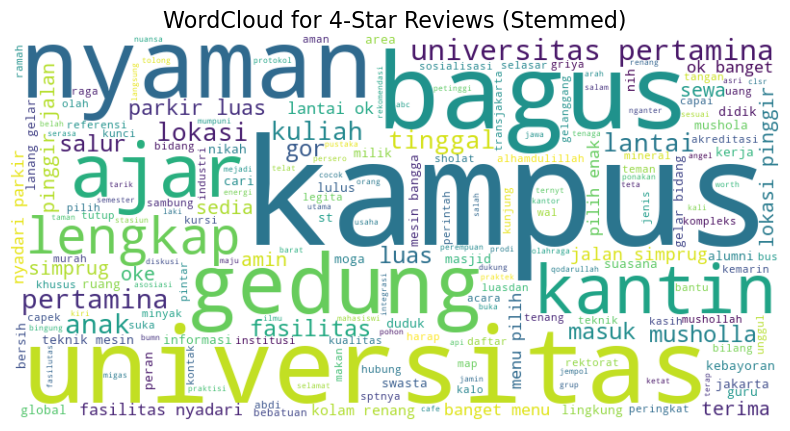

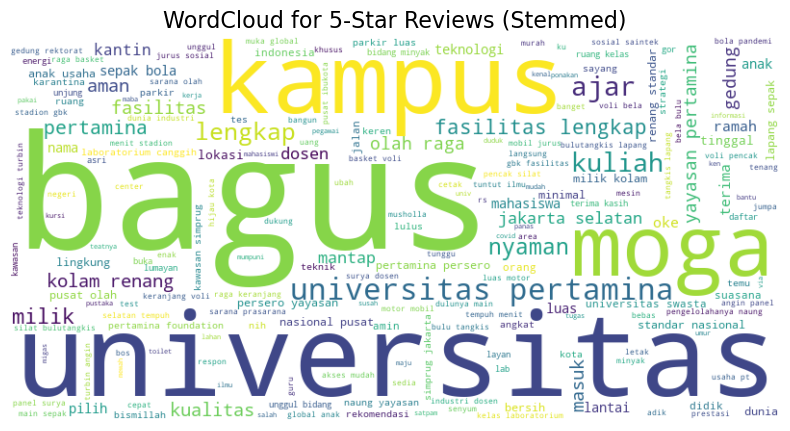

In [237]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens4'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [239]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 440/440 [00:00<00:00, 438359.56it/s]


Topic: 0 
Words: 0.043*"universitas" + 0.038*"kampus" + 0.037*"pertamina" + 0.035*"nyaman" + 0.030*"ajar" + 0.029*"kuliah" + 0.020*"bagus" + 0.015*"moga" + 0.013*"amin" + 0.012*"luas"
Topic: 1 
Words: 0.075*"bagus" + 0.063*"universitas" + 0.033*"kampus" + 0.032*"fasilitas" + 0.027*"pertamina" + 0.026*"moga" + 0.020*"lengkap" + 0.016*"pilih" + 0.015*"masuk" + 0.014*"kantin"
Topic: 2 
Words: 0.022*"gedung" + 0.021*"anak" + 0.018*"lengkap" + 0.017*"universitas" + 0.015*"oke" + 0.015*"ruang" + 0.014*"kampus" + 0.014*"bagus" + 0.010*"luas" + 0.010*"ramah"
Topic: 3 
Words: 0.044*"pertamina" + 0.041*"universitas" + 0.021*"mantap" + 0.020*"simprug" + 0.019*"kawasan" + 0.017*"parkir" + 0.014*"lokasi" + 0.014*"jakarta" + 0.014*"selatan" + 0.012*"kampus"
Topic: 4 
Words: 0.036*"milik" + 0.028*"pertamina" + 0.019*"universitas" + 0.017*"kampus" + 0.017*"pusat" + 0.017*"sepak" + 0.017*"bola" + 0.015*"anak" + 0.014*"teknologi" + 0.013*"global"


In [241]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [11:18<00:00, 67.82s/it]


✅ Nilai koherensi optimal: 0.5375
📊 Parameter terbaik: {'num_topics': 5, 'passes': 60}


In [249]:
tqdm(passes_range, desc=f"Testing {5} topics", leave=False)

Testing 5 topics:   0%|          | 0/6 [00:00<?, ?it/s]

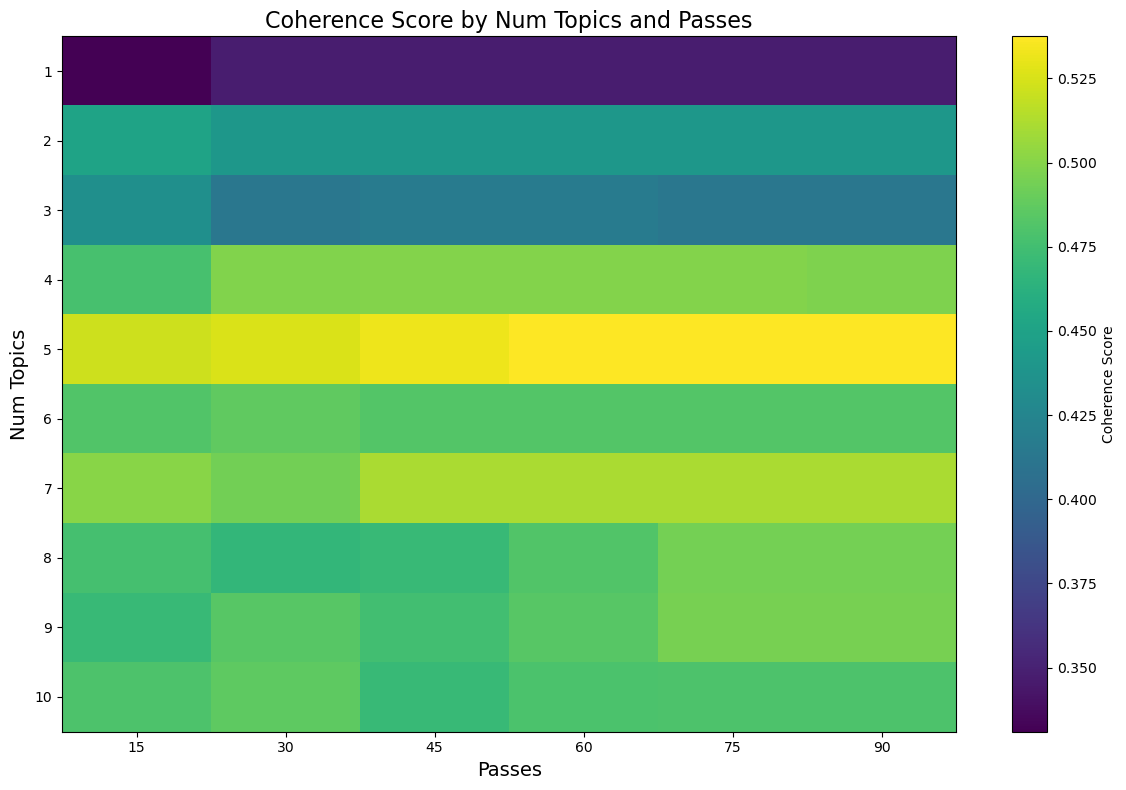

In [242]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [247]:
# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=60)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 440/440 [00:00<00:00, 439717.36it/s]


Topic: 0 
Words: 0.061*"universitas" + 0.026*"gedung" + 0.023*"parkir" + 0.020*"pertamina" + 0.013*"lokasi" + 0.013*"fasilitas" + 0.013*"lengkap" + 0.013*"renang" + 0.013*"sedia" + 0.010*"kolam"
Topic: 1 
Words: 0.088*"bagus" + 0.041*"kampus" + 0.032*"fasilitas" + 0.025*"ajar" + 0.025*"universitas" + 0.023*"nyaman" + 0.022*"lengkap" + 0.017*"luas" + 0.017*"pertamina" + 0.016*"pilih"
Topic: 2 
Words: 0.071*"universitas" + 0.059*"pertamina" + 0.029*"moga" + 0.025*"anak" + 0.022*"kampus" + 0.020*"jakarta" + 0.019*"kuliah" + 0.017*"lengkap" + 0.016*"lantai" + 0.015*"nama"
Topic: 3 
Words: 0.024*"milik" + 0.024*"pertamina" + 0.024*"universitas" + 0.020*"anak" + 0.013*"teknologi" + 0.013*"gedung" + 0.012*"global" + 0.011*"bagus" + 0.011*"renang" + 0.011*"ruang"
Topic: 4 
Words: 0.048*"kampus" + 0.022*"mantap" + 0.018*"milik" + 0.015*"senyum" + 0.015*"layan" + 0.011*"moga" + 0.011*"lokasi" + 0.011*"angkat" + 0.011*"terima" + 0.011*"via"


In [40]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=60)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics.xlsx'
sheet_name = 'UPER_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Menulis ke sheet dengan opsi menimpa jika sudah ada
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


100%|██████████| 440/440 [00:00<00:00, 440241.83it/s]


Topik telah disimpan dalam sheet 'UPER_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics.xlsx'
